# Исследование и обработка данных, построение метамодели и Состязательная валидация

В данной работе нам необходимо провести анализ и подготовить данные к дальнейшей работе.

Мы обучим несколько простых моделей, а далее объединим их предсказания с помощью метамодели и оценим результат

В конце оценим нашу модель с помощью метода Состязательная валидация (Adversarial Validation)

# Исходные данные

Изучим следующий [датасет](https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-por.csv)

Данные были получены в ходе опроса учащихся на курсах математики и португальского языка в средней школе. В нем содержится много интересной социальной, гендерной и учебной информации о студентах. Данные можно использовать, например, чтобы попытаться предсказать итоговую оценку учащихся.

Если вкратце, у нас есть 29 параметров и одна целевая переменная G3.

In [631]:
from google.colab import files
uploaded = files.upload()

Saving train_features_with_answers.csv to train_features_with_answers (11).csv


In [632]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [633]:
df = pd.read_csv('train_features_with_answers.csv')
X_train = df.drop(columns=['G3'])
y_train = df['G3']
# X_train = pd.read_csv('X_test.csv')
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      454 non-null    object 
 1   sex         454 non-null    object 
 2   age         426 non-null    float64
 3   address     449 non-null    object 
 4   famsize     454 non-null    object 
 5   Pstatus     454 non-null    object 
 6   Medu        454 non-null    int64  
 7   Fedu        454 non-null    int64  
 8   Mjob        454 non-null    object 
 9   Fjob        454 non-null    object 
 10  reason      454 non-null    object 
 11  guardian    454 non-null    object 
 12  traveltime  454 non-null    int64  
 13  studytime   454 non-null    int64  
 14  failures    454 non-null    int64  
 15  schoolsup   454 non-null    object 
 16  famsup      454 non-null    object 
 17  paid        454 non-null    object 
 18  activities  454 non-null    object 
 19  nursery     454 non-null    o

In [634]:
X_train.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,MS,M,NaN,U,LE3,T,1,3,at_home,services,...,no,yes,yes,4,3,3,2,3,3,0
1,GP,M,NaN,R,LE3,T,3,3,teacher,other,...,yes,yes,no,3,3,4,3,5,3,16
2,GP,M,15.0,NaN,GT3,T,3,4,other,other,...,yes,yes,no,5,5,1,1,1,5,0
3,MS,M,17.0,R,GT3,T,4,3,services,other,...,yes,yes,yes,4,5,5,1,3,2,4
4,GP,F,20.0,R,GT3,T,2,1,other,other,...,no,yes,yes,1,2,3,1,2,2,8


# Часть 1. Визуальный анализ данных (Exploratory Data Analysis)

Перед тем, как приступать к построению алгоритмов, необходимо понять данные, с которыми требуется работать. Для этого в подходах к построению алгоритмов машинного обучения выделят специальный этап - Разведочный анализ данных или Exploratory Data Analysis (EDA). EDA в себя включает все те, что касается описания данных: визуализацию, интерпретацию и анализ.

Прежде всего сделаем визуализацию данных для того, чтобы оценить диапазоны значений и виды их распределений.

## Характеристика: "Sex"

sex
F    257
M    189
D      5
C      1
B      1
A      1
Name: count, dtype: int64


[]

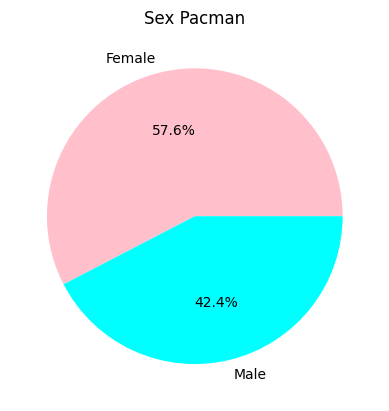

In [635]:
value_counts = df['sex'].value_counts()
print(value_counts)
labels = ['Female', 'Male']
sizes = [value_counts['F'], value_counts['M']]

plt.pie(sizes, labels=labels, colors=['pink', 'aqua'], autopct='%1.1f%%')
plt.title("Sex Pacman")
plt.plot()

## Характеристика: "Age"

age
 17.0     111
 16.0     111
 18.0      95
 15.0      73
 19.0      19
 20.0       6
 21.0       2
 161.0      1
 181.0      1
 151.0      1
 116.0      1
 22.0       1
-1.0        1
 1.0        1
 5.0        1
 8.0        1
Name: count, dtype: int64
age
17.0    111
16.0    111
18.0     95
15.0     73
19.0     19
20.0      6
21.0      2
Name: count, dtype: int64


Text(0, 0.5, 'Количество учеников')

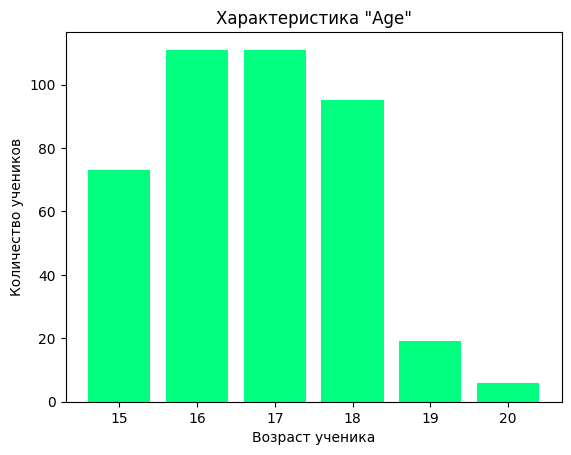

In [636]:
value_counts = df['age'].value_counts()
print(value_counts)

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Убираем выбросы
df_no_outliers = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

bins=np.arange(int(df_no_outliers['age'].min()) - 0.5, int(df_no_outliers['age'].max() + 0.5))

plt.hist(df_no_outliers['age'], bins=bins, rwidth=0.8, color='springgreen') #я уже осознала что проще было просто bar построить
print(df_no_outliers['age'].value_counts())

plt.title('Характеристика "Age"')
plt.xlabel('Возраст ученика')
plt.ylabel('Количество учеников')



## Характеристика: "Weekly study time"

studytime
2    213
1    156
3     64
4     21
Name: count, dtype: int64
Index([2, 1, 3, 4], dtype='int64', name='studytime') [213 156  64  21]



[]

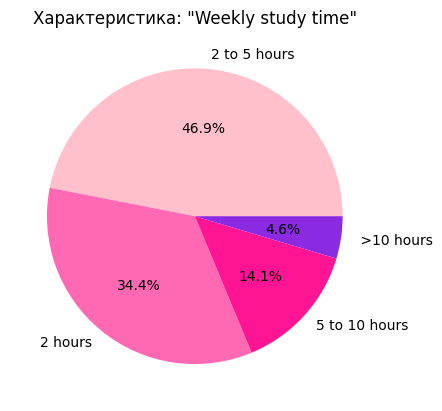

In [637]:
value_counts = df['studytime'].value_counts()
print(value_counts)

print(value_counts.index, value_counts.values)

labels = ['2 hours', '2 to 5 hours', '5 to 10 hours', ' >10 hours']
keys = value_counts.index.tolist()
values = value_counts.values.tolist()

print()

plt.pie(values, labels=[labels[i-1] for i in keys], colors=['pink', 'hotpink', 'deeppink', 'blueviolet'], autopct='%1.1f%%')
plt.title('Характеристика: "Weekly study time"')
plt.plot()

## Характеристика: "Romantic Relationship"

romantic
no     289
yes    165
Name: count, dtype: int64


<BarContainer object of 2 artists>

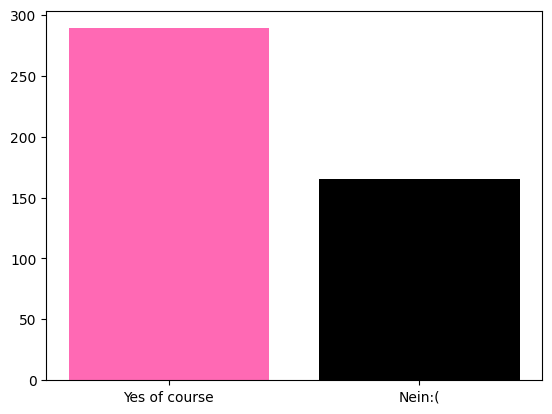

In [638]:
value_counts = df['romantic'].value_counts()
print(value_counts)

height = value_counts.values.tolist()
labels = ['Yes of course', 'Nein:(']

plt.bar(x=labels, height=height, color = ['hotpink', 'black'])

## Характеристика: "Alcohol Consumption"

Dalc
1    318
2     76
3     33
4     14
5     13
Name: count, dtype: int64
Walc
1    175
2     98
3     85
4     60
5     36
Name: count, dtype: int64


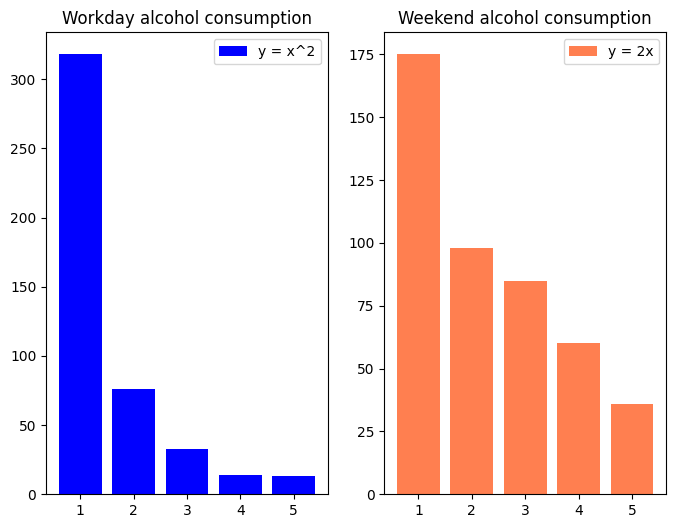

In [639]:
value_counts_dalc = df['Dalc'].value_counts()
value_counts_walc = df['Walc'].value_counts()
print(value_counts_dalc)
print(value_counts_walc)

fig, axs = plt.subplots(1, 2, figsize=(8, 6))  # 2 строки, 1 столбец

axs[0].bar([1, 2, 3, 4, 5], height=value_counts_dalc.values.tolist(), color='blue', label='y = x^2')
axs[0].set_title('Workday alcohol consumption')
axs[0].legend()

axs[1].bar([1, 2, 3, 4, 5], height=value_counts_walc.values.tolist(), color='coral', label='y = 2x')
axs[1].set_title('Weekend alcohol consumption')
axs[1].legend()

## Целевая зависимость: "G3" (Final Grade)

G3
10    70
11    69
13    60
12    47
14    47
15    36
9     26
8     26
16    23
17    21
0     10
7      8
18     6
6      2
19     1
1      1
5      1
Name: count, dtype: int64


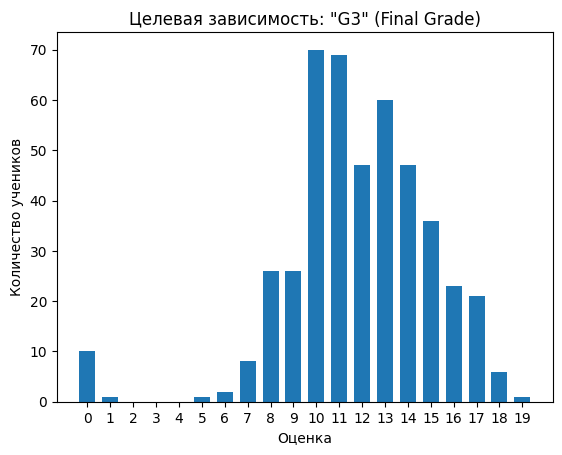

In [640]:
value_counts = df['G3'].value_counts()
print(value_counts)
indexes = value_counts.index.tolist()

bins = [x + offset for x in indexes for offset in (-0.5, 0.5)] # хочу чтобы были красивые столбцы по центру

plt.hist(df['G3'], bins=sorted(bins), rwidth=0.7)
plt.title('Целевая зависимость: "G3" (Final Grade)')
plt.xticks(ticks=np.arange(0, 20, 1))
plt.ylabel('Количество учеников')
plt.xlabel('Оценка')
plt.show()

## Прочие характеристики

## 1. Характеристика "G3-studytime"(числовая), boxplot

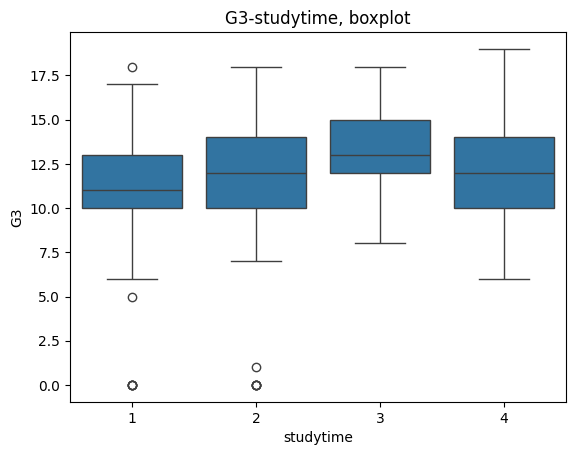

In [641]:
sns.boxplot(y=df['G3'], x=df['studytime'])
plt.title('G3-studytime, boxplot')
plt.show()

## 2. Характеристка "G3-Freetime"(числовая), violinplot

<Axes: xlabel='freetime', ylabel='G3'>

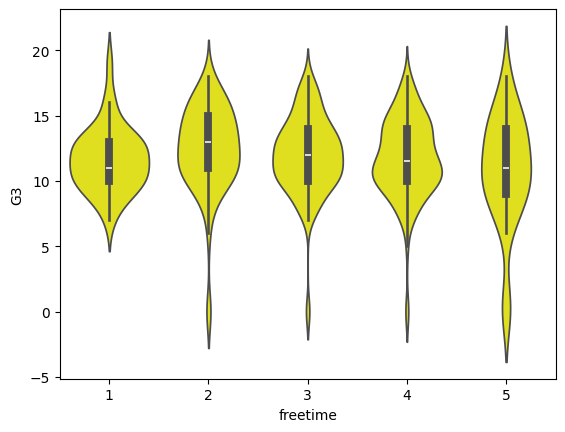

In [642]:
sns.violinplot(x=df['freetime'], y=df['G3'], color='yellow')

## 3. Характеристика "Freetime"(категориальная), pieplot

freetime
3    171
4    124
2     73
5     51
1     35
Name: count, dtype: int64


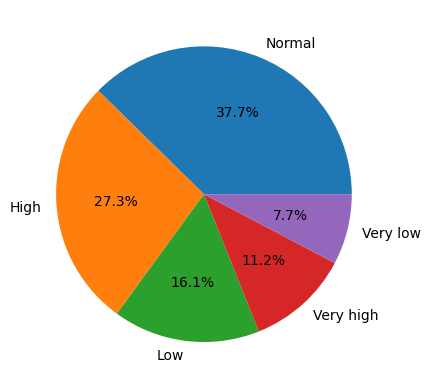

In [643]:
value_counts = df['freetime'].value_counts()
print(value_counts)

sizes = value_counts.values.tolist()
keys = value_counts.index.tolist()
labels = ['Very low', 'Low', 'Normal', 'High', 'Very high']

plt.pie(sizes, labels=[labels[i-1] for i in keys], autopct='%1.1f%%')
plt.show()

## 4. Характеристика "Mjob"(категориальная), pieplot

Mjob
other       188
at_home      99
services     94
teacher      42
health       31
Name: count, dtype: int64


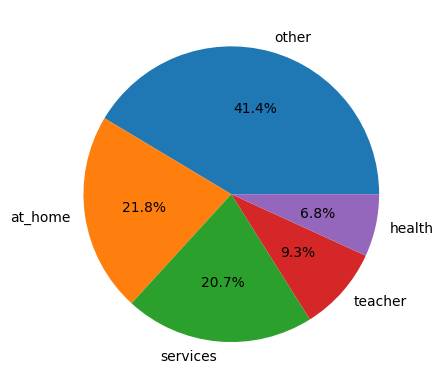

In [644]:
value_counts = df['Mjob'].value_counts()
print(value_counts)

sizes = value_counts.values.tolist()
labels = value_counts.index.tolist()

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

## Корреляция признаков

Для того, чтобы быстро получить оценку о взаимосвязи признаков целесообразно построить матрицу их корреляции. Построим матрицу корреляции.

In [645]:
df_train = df.drop(['G3'], axis=1)
df_numeric = df_train.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()  # Строим корелляционную матрицу
corr_matrix

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
age,1.000000,0.017118,0.015926,-0.045215,0.037509,-0.000269,0.050729,-0.048159,-0.019423,-0.033190,-0.038725,-0.105574,-0.026602
Medu,0.017118,1.000000,0.650052,-0.292153,0.088940,-0.172137,0.068827,0.029327,0.055263,-0.011133,-0.021110,0.045795,0.018881
Fedu,0.015926,0.650052,1.000000,-0.211014,0.077986,-0.157411,0.086715,0.032968,0.062423,-0.002507,-0.001616,0.086325,0.047975
traveltime,-0.045215,-0.292153,-0.211014,1.000000,-0.084222,0.079322,-0.025235,0.003360,0.008395,0.078637,0.048305,-0.047959,-0.041817
studytime,0.037509,0.088940,0.077986,-0.084222,1.000000,-0.125199,-0.024362,-0.075368,-0.098676,-0.152659,-0.243818,-0.052498,-0.099545
failures,-0.000269,-0.172137,-0.157411,0.079322,-0.125199,1.000000,-0.064462,0.112960,0.052652,0.153152,0.135870,0.045039,0.121685
famrel,0.050729,0.068827,0.086715,-0.025235,-0.024362,-0.064462,1.000000,0.113157,0.070991,-0.052349,-0.075185,0.111193,-0.117433
freetime,-0.048159,0.029327,0.032968,0.003360,-0.075368,0.112960,0.113157,1.000000,0.359857,0.110431,0.166500,0.109172,-0.000584
goout,-0.019423,0.055263,0.062423,0.008395,-0.098676,0.052652,0.070991,0.359857,1.000000,0.241739,0.421281,-0.008693,0.059189
Dalc,-0.033190,-0.011133,-0.002507,0.078637,-0.152659,0.153152,-0.052349,0.110431,0.241739,1.000000,0.613398,0.063682,0.217312


## Посчитайем корреляцию Спирмана и нарисуем ее в виде тепловой карты

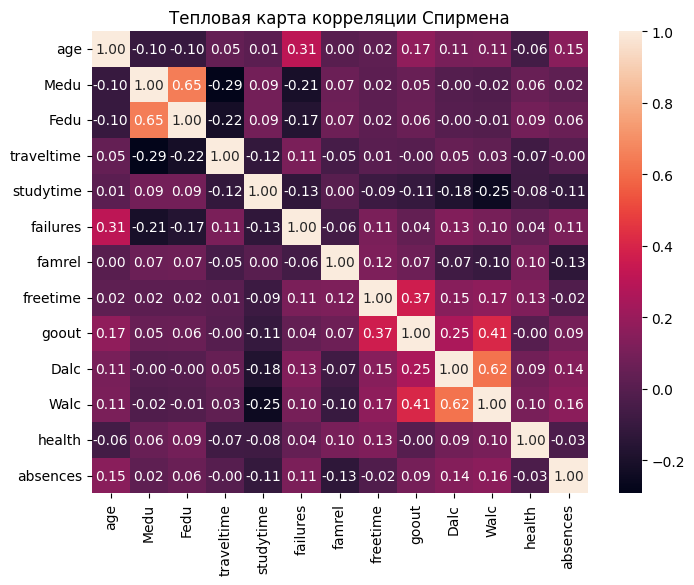

In [646]:
spearman_corr = df_numeric.corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, fmt='.2f')
plt.title("Тепловая карта корреляции Спирмена")
plt.show()

## Диапазон значений характеристик

Найдем число уникальных значений для каждого признака и сравним их между собой.

In [647]:
dictory = {}
for column in df.columns:
  unique_count = df[column].nunique()
  dictory[column] = unique_count
dictory

{'school': 2,
 'sex': 6,
 'age': 16,
 'address': 2,
 'famsize': 2,
 'Pstatus': 2,
 'Medu': 5,
 'Fedu': 5,
 'Mjob': 5,
 'Fjob': 5,
 'reason': 4,
 'guardian': 3,
 'traveltime': 4,
 'studytime': 4,
 'failures': 4,
 'schoolsup': 2,
 'famsup': 2,
 'paid': 2,
 'activities': 2,
 'nursery': 2,
 'higher': 2,
 'internet': 2,
 'romantic': 2,
 'famrel': 5,
 'freetime': 5,
 'goout': 5,
 'Dalc': 5,
 'Walc': 5,
 'health': 5,
 'absences': 22,
 'G3': 17}

In [648]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,MS,M,NaN,U,LE3,T,1,3,at_home,services,...,yes,yes,4,3,3,2,3,3,0,9
1,GP,M,NaN,R,LE3,T,3,3,teacher,other,...,yes,no,3,3,4,3,5,3,16,12
2,GP,M,15.0,NaN,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,13
3,MS,M,17.0,R,GT3,T,4,3,services,other,...,yes,yes,4,5,5,1,3,2,4,11
4,GP,F,20.0,R,GT3,T,2,1,other,other,...,yes,yes,1,2,3,1,2,2,8,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,GP,M,15.0,U,GT3,T,4,2,other,other,...,yes,no,3,3,3,1,1,3,0,10
450,GP,F,15.0,U,GT3,T,2,2,other,other,...,yes,no,5,1,2,1,1,3,4,10
451,GP,M,16.0,U,GT3,T,4,4,services,services,...,yes,no,5,3,2,1,2,5,4,15
452,MS,F,15.0,R,LE3,T,1,1,at_home,services,...,yes,no,5,4,3,1,2,4,0,10


## Найдем соотношение мужского и женского пола для самых выскоих оценок (G3) из датасета, у которых время на дорогу больше, чем 30 минут и нарисуем это соотношение на круговой диаграмме

sex
F    48
M    20
D     2
Name: count, dtype: int64


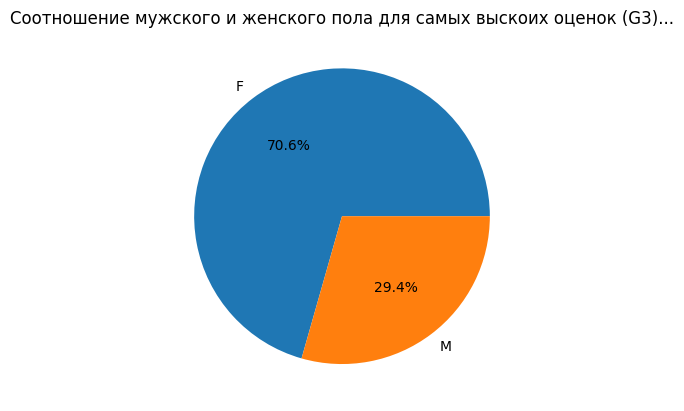

In [649]:
df_temp = df[(df['traveltime'] >= 2) & (df['G3'] > 12)]
value_counts = df_temp['sex'].value_counts()
print(value_counts)

labels = ['F', 'M']
sizes = value_counts[labels]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Cоотношение мужского и женского пола для самых выскоих оценок (G3)...")
plt.show()

##boxplot для оценок по возрасту.  

<Axes: xlabel='age', ylabel='G3'>

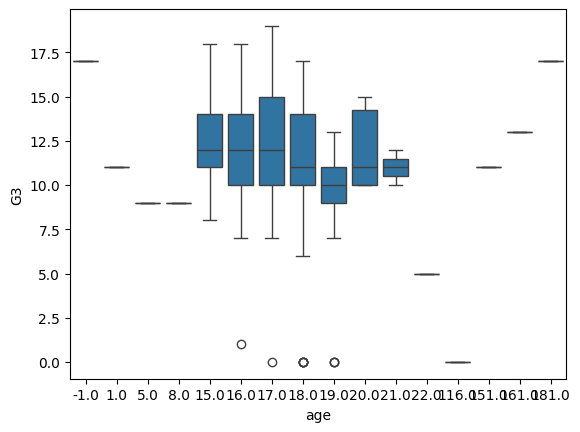

In [650]:
sns.boxplot(x=df['age'], y=df['G3'])

## Найдем id топ-5 самых юных отличников.

Сначала выделим группу отличников, потом отсортируем по возрасту по возрастанию,
потом по оценке по убыванию (ну да там есть возраст -1, он еще не родился а уже гений)

In [651]:
top_5 = df[df['G3']>14].sort_values(by=['age','G3'], ascending=[True, False])
print(top_5.index[0:5])
top_5[['age', 'G3']]

Index([249, 109, 197, 50, 112], dtype='int64')


,age,G3
249,-1.0,17
109,15.0,18
197,15.0,17
50,15.0,16
112,15.0,16
...,...,...
377,NaN,18
65,NaN,16
31,NaN,15
365,NaN,15


## Для каждого возраста найдем максимальную и минимальную оценку (G3)

In [652]:
pd.concat([df.groupby('age')['G3'].min().rename('min_G3'), df.groupby('age')['G3'].max().rename('max_G3')], axis=1)

,min_G3,max_G3
age,,
-1.0,17,17
1.0,11,11
5.0,9,9
8.0,9,9
15.0,8,18
16.0,1,18
17.0,0,19
18.0,0,17
19.0,0,13


# Часть 2. Предобработка данных

Теперь перейдем к подготовке данных для моделей машинного обучения.

## Найдем и исправим ошибки в данных

In [653]:
value_counts_dict = {col: df[col].value_counts(dropna=False) for col in df.columns}
print(value_counts_dict)

{'school': school
GP    288
MS    166
Name: count, dtype: int64, 'sex': sex
F    257
M    189
D      5
C      1
B      1
A      1
Name: count, dtype: int64, 'age': age
 17.0     111
 16.0     111
 18.0      95
 15.0      73
 NaN       28
 19.0      19
 20.0       6
 21.0       2
 22.0       1
 5.0        1
 1.0        1
-1.0        1
 181.0      1
 116.0      1
 151.0      1
 161.0      1
 8.0        1
Name: count, dtype: int64, 'address': address
U      306
R      143
NaN      5
Name: count, dtype: int64, 'famsize': famsize
GT3    325
LE3    129
Name: count, dtype: int64, 'Pstatus': Pstatus
T    403
A     51
Name: count, dtype: int64, 'Medu': Medu
2    128
4    116
1    106
3    102
0      2
Name: count, dtype: int64, 'Fedu': Fedu
2    150
1    116
3    101
4     81
0      6
Name: count, dtype: int64, 'Mjob': Mjob
other       188
at_home      99
services     94
teacher      42
health       31
Name: count, dtype: int64, 'Fjob': Fjob
other       268
services    127
at_home      31
teach

In [654]:
df['sex'] = df['sex'].where(df['sex'].isin(["F", "M"]), np.nan)

df['age'] = df['age'].where(
    ~df['age'].isna() & (df['age'] >= 15) & (df['age'] <= 22),
    np.nan
)

value_counts_dict = {col: df[col].value_counts(dropna=False) for col in df.columns}
print(value_counts_dict)

{'school': school
GP    288
MS    166
Name: count, dtype: int64, 'sex': sex
F      257
M      189
NaN      8
Name: count, dtype: int64, 'age': age
17.0    111
16.0    111
18.0     95
15.0     73
NaN      36
19.0     19
20.0      6
21.0      2
22.0      1
Name: count, dtype: int64, 'address': address
U      306
R      143
NaN      5
Name: count, dtype: int64, 'famsize': famsize
GT3    325
LE3    129
Name: count, dtype: int64, 'Pstatus': Pstatus
T    403
A     51
Name: count, dtype: int64, 'Medu': Medu
2    128
4    116
1    106
3    102
0      2
Name: count, dtype: int64, 'Fedu': Fedu
2    150
1    116
3    101
4     81
0      6
Name: count, dtype: int64, 'Mjob': Mjob
other       188
at_home      99
services     94
teacher      42
health       31
Name: count, dtype: int64, 'Fjob': Fjob
other       268
services    127
at_home      31
teacher      16
health       12
Name: count, dtype: int64, 'reason': reason
course        209
home          104
reputation     97
other          44
Name: co

## Удалим скоррелированные данные

In [655]:
df = df.drop(columns=['Fedu', 'Dalc'])
df

,school,sex,age,address,famsize,Pstatus,Medu,Mjob,Fjob,reason,...,higher,internet,romantic,famrel,freetime,goout,Walc,health,absences,G3
0,MS,M,NaN,U,LE3,T,1,at_home,services,course,...,no,yes,yes,4,3,3,3,3,0,9
1,GP,M,NaN,R,LE3,T,3,teacher,other,home,...,yes,yes,no,3,3,4,5,3,16,12
2,GP,M,15.0,NaN,GT3,T,3,other,other,home,...,yes,yes,no,5,5,1,1,5,0,13
3,MS,M,17.0,R,GT3,T,4,services,other,home,...,yes,yes,yes,4,5,5,3,2,4,11
4,GP,F,20.0,R,GT3,T,2,other,other,course,...,no,yes,yes,1,2,3,2,2,8,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,GP,M,15.0,U,GT3,T,4,other,other,course,...,yes,yes,no,3,3,3,1,3,0,10
450,GP,F,15.0,U,GT3,T,2,other,other,course,...,yes,yes,no,5,1,2,1,3,4,10
451,GP,M,16.0,U,GT3,T,4,services,services,course,...,yes,yes,no,5,3,2,2,5,4,15
452,MS,F,15.0,R,LE3,T,1,at_home,services,reputation,...,yes,yes,no,5,4,3,2,4,0,10


## Заполняем пропуски в данных

Заполнить пропуски в данных можно одним из следующи способов или разными для разных признаков:
- Заполнить нулями
- Выбросить данные с нулями (не рекомендуется)
- Заполнить средним для данного параметра
- Заполнить наиболее соответствующим данному прецеденту (рекомендуется)

Мы воспользуемся последним способом, и заполним пропуски таким значением, которое возьмем у элемента выборки, наиболее похожего на текущий элемент выборки с пропуском

In [656]:
# 'sex'  'age' 'address' with None
# ищем похожие строки с помощью евклидова расстояния(только числовые признаки)
def similarity(row1, row2, numeric_columns):
        diff = row1[numeric_columns] - row2[numeric_columns]
        return np.sqrt((diff**2).sum())
# берем самую похожую строку и берем значение оттуда
def fill_nan(df, column):
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

    if column in numeric_columns:
        numeric_columns.remove(column)

    df_copy = df.copy()
    nan_indices = df[df[column].isna()].index

    for idx in nan_indices:
        current_row = df_copy.loc[idx]
        candidates = df_copy.drop(idx).dropna(subset=[column])

        similarities = candidates.apply(lambda row: similarity(current_row, row, numeric_columns), axis=1)

        closest_match_idx = similarities.idxmin()

        df_copy.at[idx, column] = df_copy.at[closest_match_idx, column]

    return df_copy

df = fill_nan(df, 'sex')
df  = fill_nan(df, 'age')
df = fill_nan(df, 'address')

In [657]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      454 non-null    object 
 1   sex         454 non-null    object 
 2   age         454 non-null    float64
 3   address     454 non-null    object 
 4   famsize     454 non-null    object 
 5   Pstatus     454 non-null    object 
 6   Medu        454 non-null    int64  
 7   Mjob        454 non-null    object 
 8   Fjob        454 non-null    object 
 9   reason      454 non-null    object 
 10  guardian    454 non-null    object 
 11  traveltime  454 non-null    int64  
 12  studytime   454 non-null    int64  
 13  failures    454 non-null    int64  
 14  schoolsup   454 non-null    object 
 15  famsup      454 non-null    object 
 16  paid        454 non-null    object 
 17  activities  454 non-null    object 
 18  nursery     454 non-null    object 
 19  higher      454 non-null    o

## Закодируем категориальные признаки

Для этого воспользуемся методом OneHotEncoder

In [658]:
from sklearn.preprocessing import OneHotEncoder

In [659]:
encoder = OneHotEncoder(sparse_output=False)

categorical = ["school", "sex", "address", "famsize", "Pstatus",
               "Mjob", "Fjob", "reason","guardian",
               "schoolsup", "famsup", "paid", "activities",
               "nursery", "higher", "internet", "romantic"]

encoded_array = encoder.fit_transform(df[categorical])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical))
df = pd.concat([df.drop(categorical, axis=1), encoded_df], axis=1)



# Отнормируем данные



## Придумаем сложные признаки

Сложные признаки - это комбинации существующих (линейных или нелинейных).
Это нужно для того, чтобы самостоятельно добавить нелинейность в алгоритм.
Приведем два признака

### 1. health_absence
Оцениваем связь между здоровьем студента и его отсутствием на занятиях.
Чем хуже здоровье студента, тем больше он, вероятно, пропускает занятия, что может влиять на его успеваемость.

In [660]:
df['df_health_absence'] = df['health'] * df['absences']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 56 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                454 non-null    float64
 1   Medu               454 non-null    int64  
 2   traveltime         454 non-null    int64  
 3   studytime          454 non-null    int64  
 4   failures           454 non-null    int64  
 5   famrel             454 non-null    int64  
 6   freetime           454 non-null    int64  
 7   goout              454 non-null    int64  
 8   Walc               454 non-null    int64  
 9   health             454 non-null    int64  
 10  absences           454 non-null    int64  
 11  G3                 454 non-null    int64  
 12  school_GP          454 non-null    float64
 13  school_MS          454 non-null    float64
 14  sex_F              454 non-null    float64
 15  sex_M              454 non-null    float64
 16  address_R          454 non

### 2. parental_job_influence
Признак, который оценивает влияние профессий родителей на успехи студента.
Можно предположить, что работа в некоторых сферах влияет на образ жизни или воспитание.
Профессия родителей, связанная с преподаванием, положительно влиять на учебу студента.

In [661]:
df['parental_job_influence'] = df['Mjob_teacher'] * 1 + df['Fjob_teacher'] * 1 + df['Mjob_health'] * 0.5 + df['Fjob_health'] * 0.5
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     454 non-null    float64
 1   Medu                    454 non-null    int64  
 2   traveltime              454 non-null    int64  
 3   studytime               454 non-null    int64  
 4   failures                454 non-null    int64  
 5   famrel                  454 non-null    int64  
 6   freetime                454 non-null    int64  
 7   goout                   454 non-null    int64  
 8   Walc                    454 non-null    int64  
 9   health                  454 non-null    int64  
 10  absences                454 non-null    int64  
 11  G3                      454 non-null    int64  
 12  school_GP               454 non-null    float64
 13  school_MS               454 non-null    float64
 14  sex_F                   454 non-null    fl

In [662]:
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df.drop(columns=['G3']))
df_scaler = pd.DataFrame(df_scaler, columns=df.drop(columns=['G3']).columns)
df = pd.concat([df_scaler, df['G3']], axis=1)
df

,age,Medu,traveltime,studytime,failures,famrel,freetime,goout,Walc,health,...,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,df_health_absence,parental_job_influence,G3
0,0.981324,-1.333406,-0.772553,-1.097453,-0.383276,0.095112,-0.169875,-0.188474,0.530324,-0.375232,...,0.510990,2.842534,-2.842534,-0.585829,0.585829,-1.323448,1.323448,-0.740727,-0.434237,9
1,0.182899,0.452335,1.806410,-1.097453,-0.383276,-0.958082,-0.169875,0.658728,2.054166,-0.375232,...,0.510990,-0.351799,0.351799,-0.585829,0.585829,0.755602,-0.755602,2.060718,2.045555,12
2,-1.413951,0.452335,-0.772553,0.135823,-0.383276,1.148306,1.688515,-1.882879,-0.993518,1.009771,...,0.510990,-0.351799,0.351799,-0.585829,0.585829,0.755602,-0.755602,-0.740727,-0.434237,13
3,0.182899,1.345206,0.516929,0.135823,1.289872,0.095112,1.688515,1.505930,0.530324,-1.067733,...,-1.956984,-0.351799,0.351799,-0.585829,0.585829,-1.323448,1.323448,-0.273820,-0.434237,11
4,2.578175,-0.440535,0.516929,0.135823,-0.383276,-3.064470,-1.099070,-0.188474,-0.231597,-1.067733,...,0.510990,2.842534,-2.842534,-0.585829,0.585829,-1.323448,1.323448,0.193088,-0.434237,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,-1.413951,1.345206,-0.772553,2.602377,-0.383276,-0.958082,-0.169875,-0.188474,-0.993518,-0.375232,...,0.510990,-0.351799,0.351799,-0.585829,0.585829,0.755602,-0.755602,-0.740727,-0.434237,10
450,-1.413951,-0.440535,-0.772553,2.602377,-0.383276,1.148306,-2.028265,-1.035677,-0.993518,-0.375232,...,0.510990,-0.351799,0.351799,-0.585829,0.585829,0.755602,-0.755602,-0.040366,-0.434237,10
451,-0.615526,1.345206,-0.772553,-1.097453,-0.383276,1.148306,-0.169875,-1.035677,-0.231597,1.009771,...,0.510990,-0.351799,0.351799,-0.585829,0.585829,0.755602,-0.755602,0.426542,-0.434237,15
452,-1.413951,-1.333406,0.516929,0.135823,-0.383276,1.148306,0.759320,-0.188474,-0.231597,0.317269,...,0.510990,-0.351799,0.351799,-0.585829,0.585829,0.755602,-0.755602,-0.740727,-0.434237,10


# Часть 3. Стратегия валидации

Итак, у нас есть данные для обучения и данные, на которых необходимо сделать предсказание. Для оценки точности необходимо проводить валидацию (так как мало данных, можно проводить кросс валидацию).
Валидацию проще всего реализовать методами sklearn, например:
- KFold
- ShuffleSplit
- StratifiedKFold
- StratifiedShuffleSplit
- GroupKFold
- GroupShuffleSplit

In [663]:
X = df.drop(columns='G3')
y = df['G3']

In [664]:
y.value_counts()

,count
G3,
10,70
11,69
13,60
12,47
14,47
15,36
9,26
8,26
16,23


## Определим метод, по которому будем разделять данные

In [665]:
columns = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns)
print(X[:5])

        age      Medu  traveltime  studytime  failures    famrel  freetime  \
0  0.981324 -1.333406   -0.772553  -1.097453 -0.383276  0.095112 -0.169875   
1  0.182899  0.452335    1.806410  -1.097453 -0.383276 -0.958082 -0.169875   
2 -1.413951  0.452335   -0.772553   0.135823 -0.383276  1.148306  1.688515   
3  0.182899  1.345206    0.516929   0.135823  1.289872  0.095112  1.688515   
4  2.578175 -0.440535    0.516929   0.135823 -0.383276 -3.064470 -1.099070   

      goout      Walc    health  ...  nursery_no  nursery_yes  higher_no  \
0 -0.188474  0.530324 -0.375232  ...   -0.510990     0.510990   2.842534   
1  0.658728  2.054166 -0.375232  ...   -0.510990     0.510990  -0.351799   
2 -1.882879 -0.993518  1.009771  ...   -0.510990     0.510990  -0.351799   
3  1.505930  0.530324 -1.067733  ...    1.956984    -1.956984  -0.351799   
4 -0.188474 -0.231597 -1.067733  ...   -0.510990     0.510990   2.842534   

   higher_yes  internet_no  internet_yes  romantic_no  romantic_yes  \
0  

In [666]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [667]:
smote = SMOTE(sampling_strategy={0: 20, 7: 20, 18: 20}, random_state=42, k_neighbors=5)
ros = RandomOverSampler(sampling_strategy={1: 10, 5: 10, 6: 10, 19: 10}, random_state=42) #их слишком мало для SMOTE


X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled, y_resampled = ros.fit_resample(X_resampled, y_resampled)

print("After Oversampling:", dict(zip(*np.unique(y_resampled, return_counts=True))))

After Oversampling: {0: 20, 1: 10, 5: 10, 6: 10, 7: 20, 8: 26, 9: 26, 10: 70, 11: 69, 12: 47, 13: 60, 14: 47, 15: 36, 16: 23, 17: 21, 18: 20, 19: 10}


__Выбор:__ выбирем StratifiedKFold. Почему:

1) KFold и ShuffleSplit не подходят, так как не учитывают дисбаланс классов(а у нас он явно есть, если посмотреть на график распределения оценок).

2) GroupKFold и GroupShuffleSplit используются в случае, если данные поделены на группы. У нас такого нет

3) Выбирая между StratifiedKFold и StratifiedShuffleSplit, выберуем
1. У нас небольшие данные, поэтому можем использовать последовательные фолды, нет особого смысла использовать случайные.
2. Первый проще в реализации, не будем усложнять себе life


Я ПЕРЕДУМАЛА!
Очень сильный дисбаланс классов (для некоторых классов всего по одному наблюдению). у меня было нескольок вариантов:
1) объединить такие оценки с соседними оценками(уменьшить количество классов, объединив некоторые близкие друг к другу классы(оценки))
2) полностью устранить дисбаланс классов, искусственно добавив В ТЕСТОВУЮ выборку больше элементов тех классов, которых очень мало. И юзать KFold(так как дисбаланс устранен)
3!) Постараться частично улучшить баланс классов, чтобы можно было применить хотя бы StratifiedKFold нормально. Наверное выберу этот вариант. Хотя второй был бы проще. Для наблюдений, кол-во которых больше 5, буду "гененировать" новые строки с помощью SMOTE, а для тех кол-во которых меньше - просто дублировать

Я Осознала что... некоторых оценок вообще нет, и если решать задачу классификации, например оценку 2 я никогда не смогу получить. Тогда хотелось бы решать задачу регрессии! Ограничить значения и округлять их

In [668]:
X.shape, y.shape

((454, 56), (454,))

# Часть 4. Обучение алгоритма

Целевая переменная принимает дискретные значения [0; 20], поэтому вы можете поставить как задачу классификации, так и задачу регрессии.

## KNN

In [669]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [670]:
knn = KNeighborsClassifier(n_neighbors=3)
fold_accuracies = []

skf = StratifiedKFold(n_splits=20)

for fold, (train_idx, test_idx) in enumerate(skf.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_idx], X_resampled.iloc[test_idx]
    y_train, y_test = y_resampled.iloc[train_idx], y_resampled.iloc[test_idx]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)

    print(f"Fold {fold}: Accuracy = {accuracy:.4f}")

mean_accuracy = np.mean(fold_accuracies)
print(f"Mean Accuracy across 20 folds: {mean_accuracy:.4f}")

Fold 1: Accuracy = 0.3333
Fold 2: Accuracy = 0.2593
Fold 3: Accuracy = 0.2593
Fold 4: Accuracy = 0.2963
Fold 5: Accuracy = 0.2963
Fold 6: Accuracy = 0.1923


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=20.
  warnings.warn(


Fold 7: Accuracy = 0.2308
Fold 8: Accuracy = 0.3846
Fold 9: Accuracy = 0.3077
Fold 10: Accuracy = 0.1923
Fold 11: Accuracy = 0.2692
Fold 12: Accuracy = 0.2692
Fold 13: Accuracy = 0.1923
Fold 14: Accuracy = 0.3846
Fold 15: Accuracy = 0.2692
Fold 16: Accuracy = 0.3462
Fold 17: Accuracy = 0.3077
Fold 18: Accuracy = 0.4231
Fold 19: Accuracy = 0.3077
Fold 20: Accuracy = 0.3077
Mean Accuracy across 20 folds: 0.2915


## Bayes

In [671]:
from sklearn.naive_bayes import GaussianNB

In [672]:
nb = GaussianNB()

skf = StratifiedKFold(n_splits=10)

fold_accuracies = []


for fold, (train_idx, test_idx) in enumerate(skf.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_idx], X_resampled.iloc[test_idx]
    y_train, y_test = y_resampled.iloc[train_idx], y_resampled.iloc[test_idx]

    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)

    print(f"Fold {fold}: Accuracy = {accuracy:.4f}")

# Средняя точность по всем фолдам
mean_accuracy = np.mean(fold_accuracies)
print(f"Mean Accuracy across  folds: {mean_accuracy:.4f}")

Fold 1: Accuracy = 0.1887
Fold 2: Accuracy = 0.1887
Fold 3: Accuracy = 0.1887
Fold 4: Accuracy = 0.1887
Fold 5: Accuracy = 0.1887
Fold 6: Accuracy = 0.2115
Fold 7: Accuracy = 0.1923
Fold 8: Accuracy = 0.2308
Fold 9: Accuracy = 0.2115
Fold 10: Accuracy = 0.2308
Mean Accuracy across  folds: 0.2020


## Регрессия

In [673]:
from sklearn.linear_model import LogisticRegression

In [674]:
lr = LogisticRegression(C=0.1, max_iter=10000)

skf = StratifiedKFold(n_splits=10)

fold_accuracies = []


for fold, (train_idx, test_idx) in enumerate(skf.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_idx], X_resampled.iloc[test_idx]
    y_train, y_test = y_resampled.iloc[train_idx], y_resampled.iloc[test_idx]

    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)

    print(f"Fold {fold}: Accuracy = {accuracy:.4f}")

# Средняя точность по всем фолдам
mean_accuracy = np.mean(fold_accuracies)
print(f"\nMean Accuracy across folds: {mean_accuracy:.4f}")

Fold 1: Accuracy = 0.2642
Fold 2: Accuracy = 0.2264
Fold 3: Accuracy = 0.3019
Fold 4: Accuracy = 0.2453
Fold 5: Accuracy = 0.3585
Fold 6: Accuracy = 0.2885
Fold 7: Accuracy = 0.3077
Fold 8: Accuracy = 0.2885
Fold 9: Accuracy = 0.2500
Fold 10: Accuracy = 0.3462

Mean Accuracy across folds: 0.2877


## SVM

In [675]:
from sklearn.svm import SVC

In [676]:
svm = SVC(C=0.5, kernel='linear', probability=True, random_state=42)
fold_accuracies = []

skf = StratifiedKFold(n_splits=20)

for fold, (train_idx, test_idx) in enumerate(skf.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_idx], X_resampled.iloc[test_idx]
    y_train, y_test = y_resampled.iloc[train_idx], y_resampled.iloc[test_idx]

    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)

    print(f"Fold {fold}: Accuracy = {accuracy:.4f}")

mean_accuracy = np.mean(fold_accuracies)
print(f"Mean Accuracy across 20 folds: {mean_accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=20.
  warnings.warn(


Fold 1: Accuracy = 0.2963
Fold 2: Accuracy = 0.3333
Fold 3: Accuracy = 0.2593
Fold 4: Accuracy = 0.2593
Fold 5: Accuracy = 0.2963
Fold 6: Accuracy = 0.3462
Fold 7: Accuracy = 0.1923
Fold 8: Accuracy = 0.3077
Fold 9: Accuracy = 0.4615
Fold 10: Accuracy = 0.2308
Fold 11: Accuracy = 0.2692
Fold 12: Accuracy = 0.3077
Fold 13: Accuracy = 0.2692
Fold 14: Accuracy = 0.3077
Fold 15: Accuracy = 0.4231
Fold 16: Accuracy = 0.2692
Fold 17: Accuracy = 0.1923
Fold 18: Accuracy = 0.3077
Fold 19: Accuracy = 0.3462
Fold 20: Accuracy = 0.3846
Mean Accuracy across 20 folds: 0.3030


## Построим сложную модель на основе предыдущих четырех простых и оцените ее точность

Вариант 1. Взвесить предсказания простых моделей

Для этого будем использовать метамодель - модель линейной регрессии. Так мы подберем оптимальные веса для каждой простой модели

In [677]:
from sklearn.metrics import mean_squared_error

In [678]:
models = [knn, nb, lr, svm]
fold_mse = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X_resampled, y_resampled), 1):
  X_train, X_test = X_resampled.iloc[train_idx], X_resampled.iloc[test_idx]
  y_train, y_test = y_resampled.iloc[train_idx], y_resampled.iloc[test_idx]

  predictions = []

  for model in models:
    y_pred = model.predict(X_test)
    predictions.append(y_pred)

  stacked_features = np.column_stack(predictions)

  # Обучаем метамодель
  meta_model = LinearRegression()
  meta_model.fit(stacked_features, y_test)

  stacked_predictions = meta_model.predict(stacked_features).astype(np.int64)
  mse = mean_squared_error(y_test, y_pred)
  fold_mse.append(mse)
  print(f"Fold {fold}: MSE: {mse}")

mean_mse = np.mean(fold_mse)
print(f"Mean mse across 20 folds: {mean_mse:.4f}")

Fold 1: MSE: 0.48148148148148145
Fold 2: MSE: 1.962962962962963
Fold 3: MSE: 3.814814814814815
Fold 4: MSE: 5.62962962962963
Fold 5: MSE: 0.9259259259259259
Fold 6: MSE: 3.1923076923076925
Fold 7: MSE: 1.0384615384615385
Fold 8: MSE: 4.846153846153846
Fold 9: MSE: 1.6153846153846154


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=20.
  warnings.warn(


Fold 10: MSE: 3.5384615384615383
Fold 11: MSE: 1.9615384615384615
Fold 12: MSE: 0.9615384615384616
Fold 13: MSE: 1.0384615384615385
Fold 14: MSE: 9.307692307692308
Fold 15: MSE: 1.6153846153846154
Fold 16: MSE: 1.0384615384615385
Fold 17: MSE: 2.730769230769231
Fold 18: MSE: 4.461538461538462
Fold 19: MSE: 1.8846153846153846
Fold 20: MSE: 4.846153846153846
Mean mse across 20 folds: 2.8446


Вариант 2. Оценить корреляцию предсказаний простых моделей.

Корреляционная матрица:
          0         1         2         3
0  1.000000  0.724937  0.872421  0.800770
1  0.724937  1.000000  0.801261  0.713797
2  0.872421  0.801261  1.000000  0.882413
3  0.800770  0.713797  0.882413  1.000000


<Figure size 800x600 with 0 Axes>

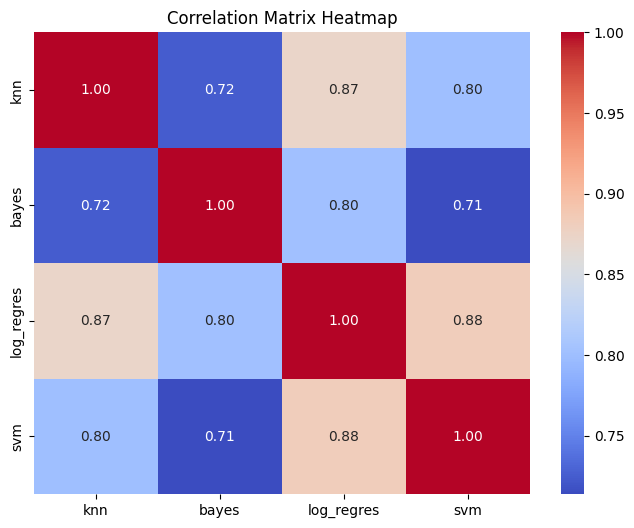

In [679]:
df_stacked = pd.DataFrame(stacked_features)

names = ['knn', 'bayes', 'log_regres', 'svm']

correlation_matrix = df_stacked.corr()

print("Корреляционная матрица:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    xticklabels=names,
    yticklabels=names
)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Сделаем итоговое предсказание

In [680]:
from google.colab import files
uploaded = files.upload()

X_test = pd.read_csv('X_test.csv')
X_test.info()

Saving X_test.csv to X_test (7).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      195 non-null    object
 1   sex         195 non-null    object
 2   age         195 non-null    int64 
 3   address     195 non-null    object
 4   famsize     195 non-null    object
 5   Pstatus     195 non-null    object
 6   Medu        195 non-null    int64 
 7   Fedu        195 non-null    int64 
 8   Mjob        195 non-null    object
 9   Fjob        195 non-null    object
 10  reason      195 non-null    object
 11  guardian    195 non-null    object
 12  traveltime  195 non-null    int64 
 13  studytime   195 non-null    int64 
 14  failures    195 non-null    int64 
 15  schoolsup   195 non-null    object
 16  famsup      195 non-null    object
 17  paid        195 non-null    object
 18  activities  195 non-null    object
 19  nursery     19

In [681]:
encoder = OneHotEncoder(sparse_output=False)

categorical = ["school", "sex", "address", "famsize", "Pstatus",
               "Mjob", "Fjob", "reason","guardian",
               "schoolsup", "famsup", "paid", "activities",
               "nursery", "higher", "internet", "romantic"]

encoded_array = encoder.fit_transform(X_test[categorical])
encoded_X_test = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical))
X_test = pd.concat([X_test.drop(categorical, axis=1), encoded_X_test], axis=1)

In [682]:
X_test['df_health_absence'] = X_test['health'] * X_test['absences']
X_test['parental_job_influence'] = X_test['Mjob_teacher'] * 1 + X_test['Fjob_teacher'] * 1 + X_test['Mjob_health'] * 0.5 + X_test['Fjob_health'] * 0.5

In [683]:
X_test = X_test.drop(columns=['Dalc', 'Fedu'])
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     195 non-null    int64  
 1   Medu                    195 non-null    int64  
 2   traveltime              195 non-null    int64  
 3   studytime               195 non-null    int64  
 4   failures                195 non-null    int64  
 5   famrel                  195 non-null    int64  
 6   freetime                195 non-null    int64  
 7   goout                   195 non-null    int64  
 8   Walc                    195 non-null    int64  
 9   health                  195 non-null    int64  
 10  absences                195 non-null    int64  
 11  school_GP               195 non-null    float64
 12  school_MS               195 non-null    float64
 13  sex_F                   195 non-null    float64
 14  sex_M                   195 non-null    fl

In [684]:
scaler = StandardScaler()
X_test_scaler = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaler, columns=X_test.columns)

In [685]:
predictions = []

for model in models:
  y_pred = model.predict(X_test)
  predictions.append(y_pred)

stacked_features = np.column_stack(predictions)
stacked_predictions = meta_model.predict(stacked_features).astype(np.int64)

In [686]:
stacked_predictions

array([15, 12,  6, 12, 10, 13, 12,  6, 11, 10, 13, 10, 14, 11,  9, 13, 13,
       10, 12, 15, 12, 11, 14, 10, 12, 15,  9, 14, 10, 12,  9, 13,  7,  9,
       10, 11, 13, 13, 12, 12, 11, 14,  8, 13, 12, 10, 12, 11, 11, 10,  5,
       12, 11,  2, 11, 18, 11, 10,  9, 10,  7, 13, 14, 13, 16, 12,  9,  7,
        8, 11, 13, 12, 10,  9, 11, 10, 12, 13, 12, 12, 10, 12, 10,  9, 11,
       17, 10, 12, 11, 13, 15, 14, 11, 15,  9, 14,  9, 16, 10, 10, 15, 13,
       11,  8, 10,  8,  8, 11,  8, 12, 14, 13, 13,  8,  9,  4, 11, 12,  8,
        8, 14,  0, 10, 10, 10, 12, 12,  9, 14, 10, 13, 10, 13, 10, 10,  9,
        0, 10,  8, 11, 12, 11, 10,  9,  9,  7, 13, 12, 13,  9, 12, 12,  8,
       13, 12, 17, 14, 14,  9, 12, 12, 15, 10, 17, 12, 12, 12,  9,  9, 14,
       13,  9,  4, 10, 10, 13, 12,  9,  0, 11, 13, 13, 13, 10, 13, 11, 12,
        9, 10, 10,  8,  9,  9, 10, 10])

In [687]:
# from google.colab import files
# uploaded = files.upload()

# submission = pd.read_csv('sample_submission.csv', index_col='id')
# submission['G3'] = stacked_predictions
# submission
# submission.to_csv('submission.csv', index=False)
# files.download('submission.csv')

# Часть 6. Состязательная валидация (Adversarial Validation)

Данная стратегия часто применяется в соревнованиях по машинному обучению. Так как проверить свой алгоритм возможно только на заданном тренировочном наборе данных, а результат требуется к набору, для которого нет ответов, то выбирают следующий подход:
- оценить степень схожести тренировочных и тестовых данных;
- составить валидацию из тех тренировочных данных, которые больше похожи на тестовые.

Алгоритм реализации AV:
1. Удаляем ответы из тренировочных данных.
2. Добавляем специальные метки (```is_test```) для классов: тренировочные данные и тестовые.
То есть у тестовых данных будет значение ```is_test = 1```, а у тренировочных ```is_test = 0```.
4. Учим алгоритм классификации предсказывать заданную метку ```is_test```.
5. Делим тренировочные данные на N частей и проводим кросс-валидацию.

Обучаем N алгоритмов классификации: каждый обучается на всех тестовых данных и на N-1 наборах тренировочных. Предсказываем на 1 тренировочном наборе.

6. Для каждого элемента в выборке предсказываем вероятность принадлежности класса и сортируем тренировочные данные по вероятности принадлежности тестовой выборке.
7. Выделяем заданное число данных в валидацию.
8. Обучаемся для итогового предсказания на всех данных.

In [688]:
from sklearn.ensemble import RandomForestClassifier

In [694]:
# Создаем метки для тренировочных и тестовых данных
X_all = np.vstack([df.drop(columns=['G3']).values, X_test])
n_train = df.shape[0]
n_test = X_test.shape[0]
is_test = np.hstack([np.zeros(n_train), np.ones(n_test)])

# Кросс-валидация для оценки предсказания is_test
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []

X_all = pd.DataFrame(X_all, columns=df.drop(columns=['G3']).columns)

for train_idx, val_idx in kf.split(X_all, is_test):
    X_train_fold, X_val_fold = X_all.iloc[train_idx], X_all.iloc[val_idx]
    y_train_fold, y_val_fold = is_test[train_idx], is_test[val_idx]

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_fold, y_train_fold)

    val_preds = clf.predict_proba(X_val_fold)[:, 1]
    mse = mean_squared_error(y_val_fold, val_preds)
    mse_scores.append(mse)

print(f"Mean MSE for is_test prediction: {np.mean(mse_scores):.4f}")

# Обучаем модель для предсказания принадлежности к тестовой выборке на всех данных
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_all, is_test)

# Предсказываем вероятность принадлежности к тестовой выборке
prob_test = clf.predict_proba(df.drop(columns=['G3']))[:, 1]

# Сортируем тренировочные данные по вероятности принадлежности тестовой выборке
sorted_indices = np.argsort(-prob_test)
X_train_sorted = df.drop(columns=['G3']).iloc[sorted_indices].values
y_train_sorted = df['G3'].iloc[sorted_indices].values

val_size = int(0.2 * len(X_train))
X_val, y_val = X_train_sorted[:val_size], y_train_sorted[:val_size]
X_train_final, y_train_final = X_train_sorted[val_size:], y_train_sorted[val_size:]

# Оцениваем качество метамодели
predictions = []

X_val = pd.DataFrame(X_val, columns=df.drop(columns=['G3']).columns)

for model in models:
  y_pred = model.predict(X_val)
  predictions.append(y_pred)

stacked_features = np.column_stack(predictions)
stacked_predictions = meta_model.predict(stacked_features).astype(np.int64)

mse = mean_squared_error(y_val, stacked_predictions)
print(f"MSE on validation set: {mse:.4f}")


Mean MSE for is_test prediction: 0.0001
MSE on validation set: 5.0303
